In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

In [176]:
df = pd.read_csv("Advertising.csv")

In [177]:
# Since sales is in thousands
df['sales'] = df['sales'] * 1000

In [178]:
df.head()
# $ spent on marketing using TV, radio and newspaper channels and the sales during the given time period

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [179]:
df.info()
# No missing values found and all variables are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


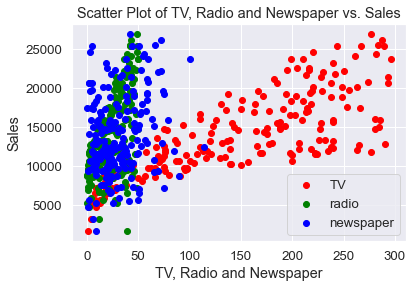

In [180]:
plt.scatter(df['TV'], df['sales'], color='red', label='TV')
plt.scatter(df['radio'], df['sales'], color='green', label='radio')
plt.scatter(df['newspaper'], df['sales'], color='blue', label='newspaper')

# Customize the plot
plt.title('Scatter Plot of TV, Radio and Newspaper vs. Sales')
plt.xlabel('TV, Radio and Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show();

# Sales and TV shows strong positive correlation

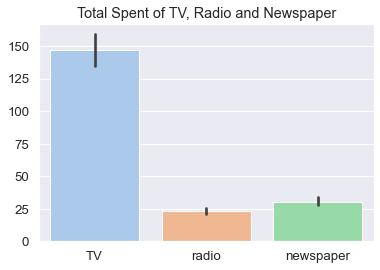

In [181]:
#Total Spendings 
sns.barplot(data=df[['TV', 'radio', 'newspaper']], palette='pastel')

# Adding labels and title
plt.title('Total Spent of TV, Radio and Newspaper')

# Show the plot
plt.show();

# Need to see the distribution because of huge difference between TV and other variables

In [182]:
df.describe().T
# Since TV values are higher, standardization or normalization is required before defining the model

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14022.5000,5217.456566,1600.0,10375.000,12900.00,17400.000,27000.0


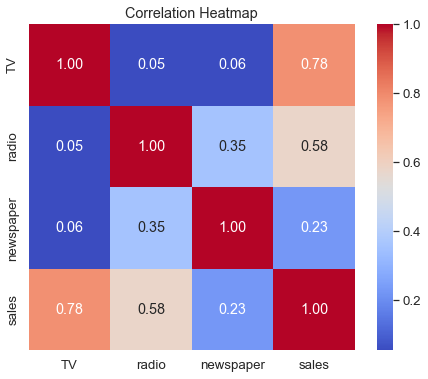

In [183]:
corr_matrix = df.corr()
# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show();

**Heatmap shows no multi-collinearity between independent variables which satisfies one of the assumptions of OLS. Also shows strong positive correlation between TV and Sales**

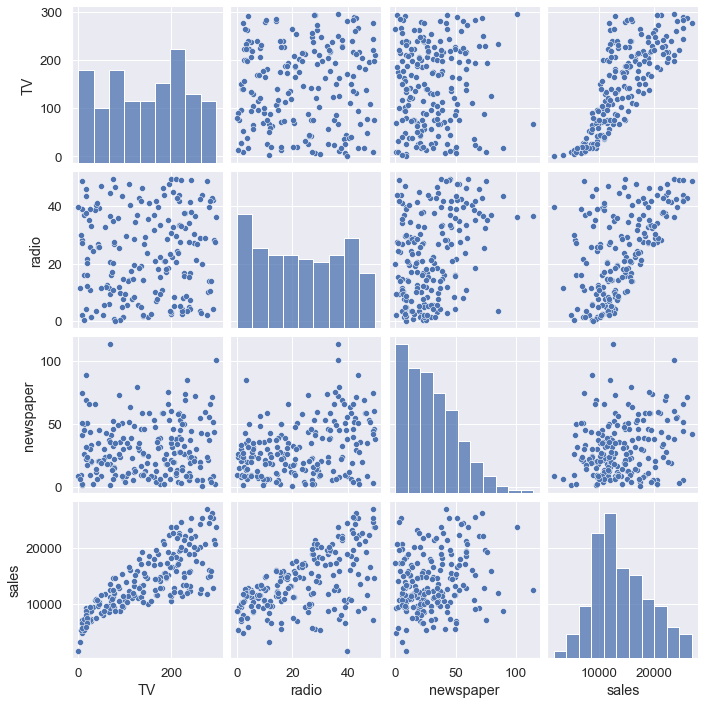

In [184]:
sns.pairplot(data= df)
plt.show();
# Pair plots and correlation heatmap suggests linear relationships between sales and independent variables

<AxesSubplot:xlabel='TV', ylabel='sales'>

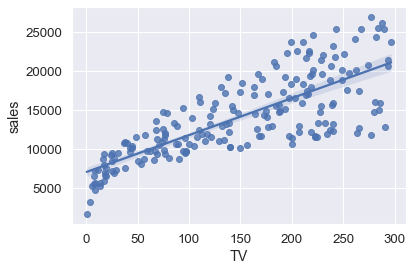

<AxesSubplot:xlabel='radio', ylabel='sales'>

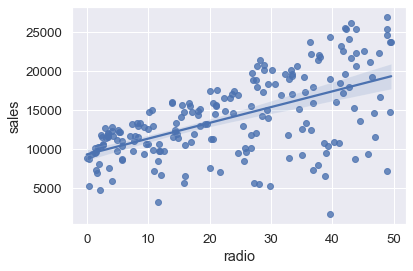

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

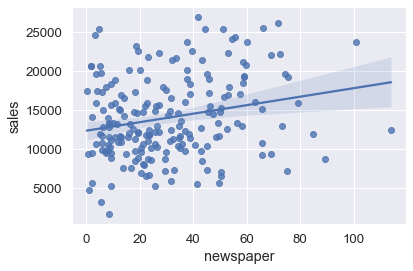

In [185]:
for i in df.columns:
    if i != "sales":
        sns.regplot(data=df, x=i, y="sales")
        plt.show()
# It proves the point further about linear relationships

In [186]:
y = df.iloc[:,-1].values
X = df.iloc[:,0:-1].values

In [187]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.58e-96
Time:                        10:42:57   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.402e+04    119.184    117.655      0.0

**The result suggests TV and Radio channels should be continually used for marketing whereas Newspaper is not significant for optimizing sales**